In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('marketing_customer_analysis.csv')


In [3]:
numerical = data.select_dtypes(include=np.number)

categoricals = data.select_dtypes(include=np.object)


/var/folders/6c/5stclpld7w5frqs_r1bxtwbw0000gn/T/ipykernel_5459/1556176340.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(include=np.object)


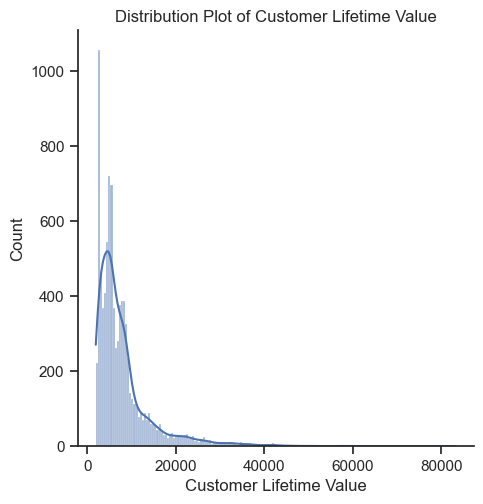

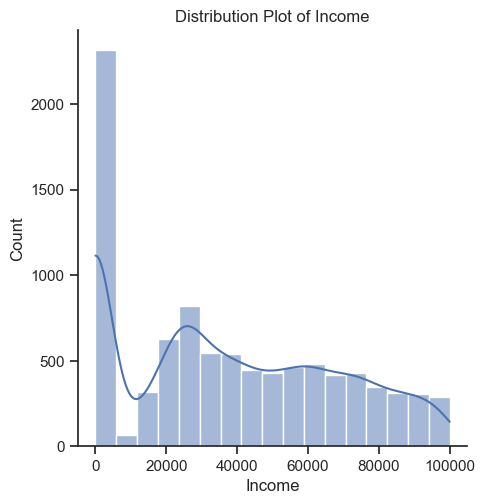

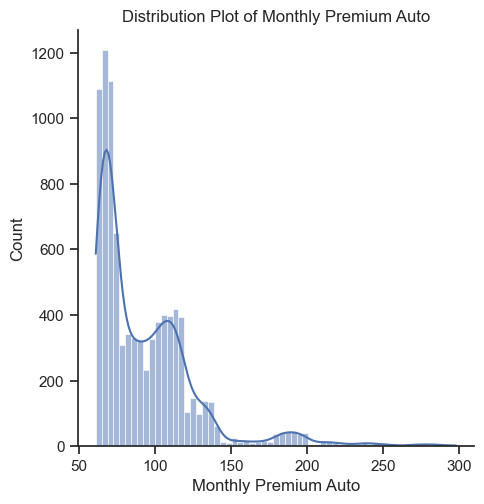

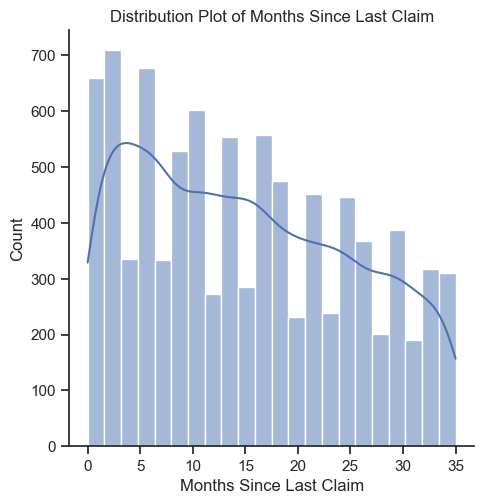

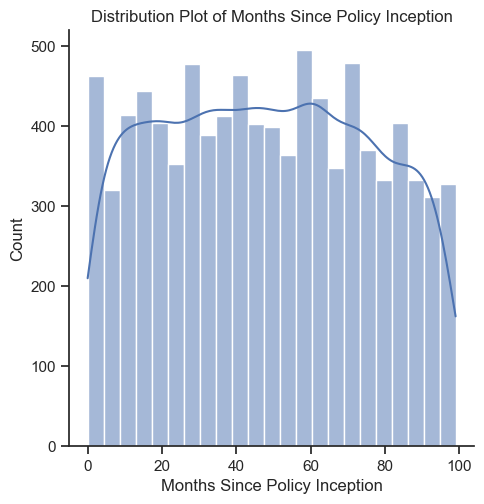

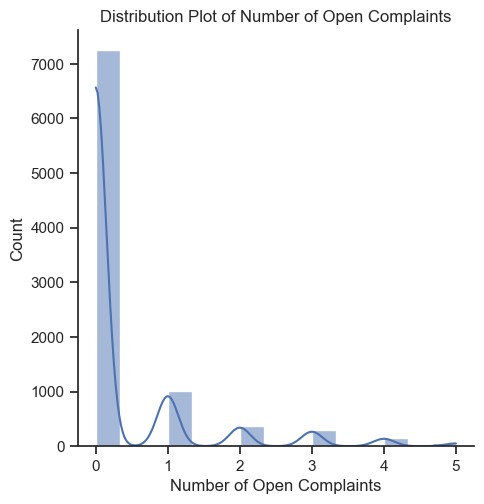

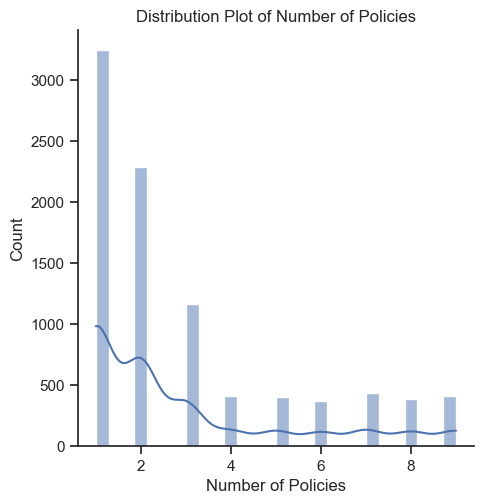

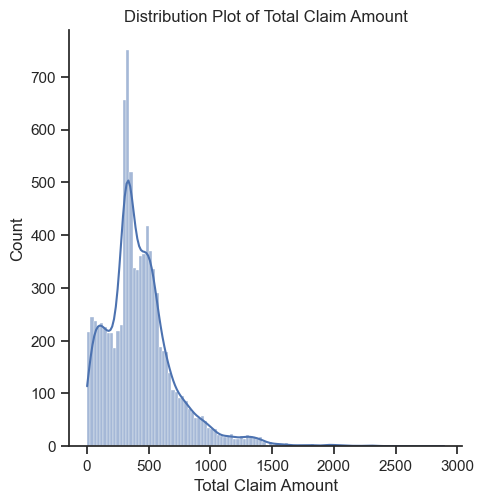

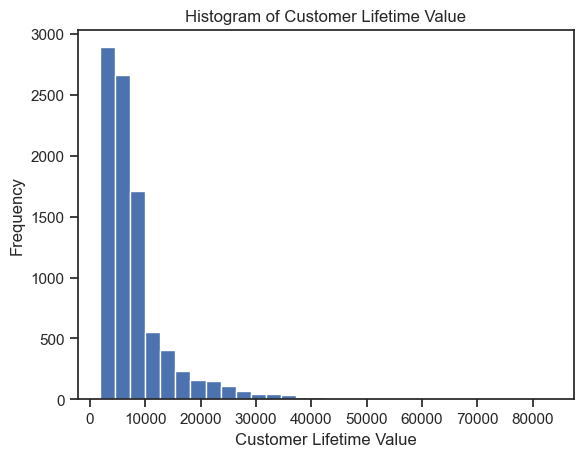

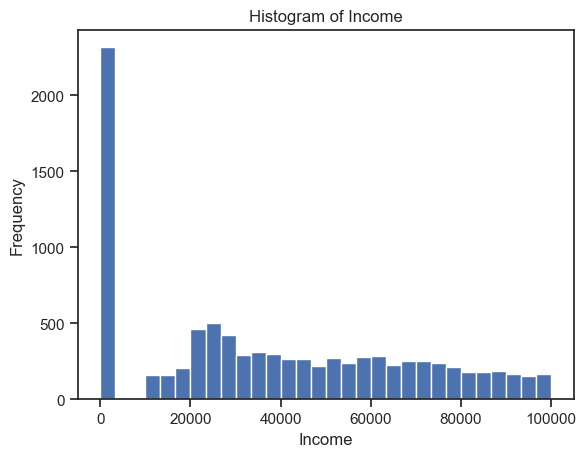

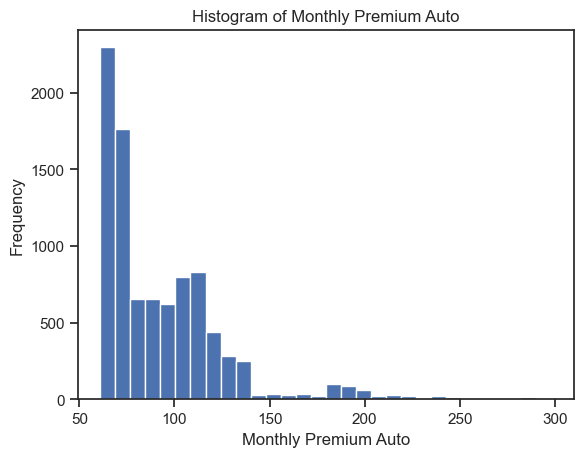

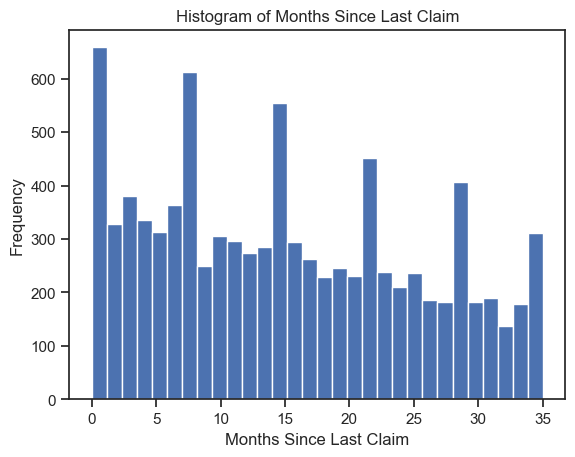

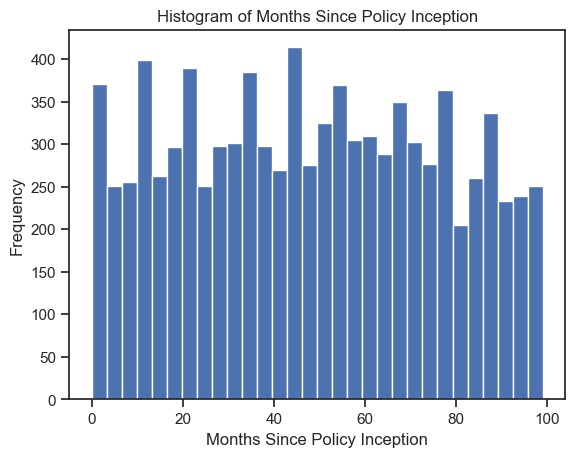

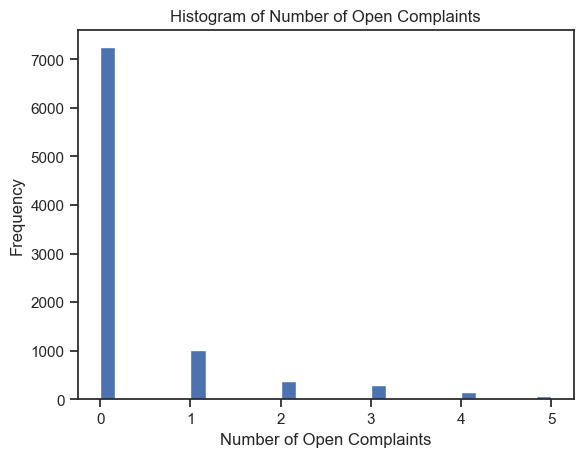

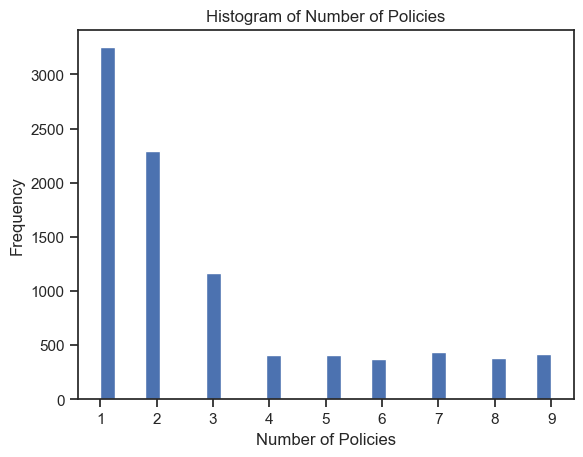

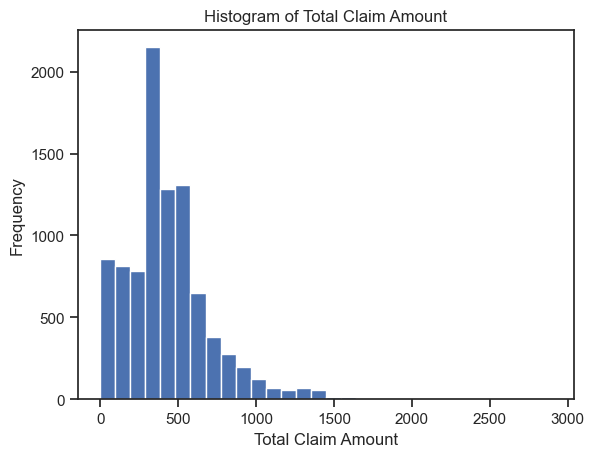

In [4]:
# Seaborn distribution plots
sns.set(style="ticks", color_codes=True)
for column in numerical.columns:
    sns.displot(data=numerical, x=column, kde=True)
    plt.title(f'Distribution Plot of {column}')
    plt.show()

# Matplotlib histograms
for column in numerical.columns:
    plt.hist(numerical[column], bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [5]:
skewness = numerical.skew()
for column, skew in skewness.iteritems():
    print(f"Skewness of {column}: {skew}")


Skewness of Customer Lifetime Value: 3.0322802599299847
Skewness of Income: 0.28688727581189166
Skewness of Monthly Premium Auto: 2.1235464499475345
Skewness of Months Since Last Claim: 0.2785863118107981
Skewness of Months Since Policy Inception: 0.040164961597799524
Skewness of Number of Open Complaints: 2.783263052399567
Skewness of Number of Policies: 1.2533327352739663
Skewness of Total Claim Amount: 1.7149658097209557


/var/folders/6c/5stclpld7w5frqs_r1bxtwbw0000gn/T/ipykernel_5459/1568185205.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, skew in skewness.iteritems():


In [6]:
correlation_matrix = numerical.corr().abs()
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
high_correlation = correlation_matrix.where(upper_triangle)
high_correlation_pairs = high_correlation.stack().reset_index()
high_correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['Correlation'] > 0.9]

if not high_correlation_pairs.empty:
    # Find the least correlated feature with total_claim_amount
    least_correlated = high_correlation_pairs[
        high_correlation_pairs['Feature 1'] != 'total_claim_amount'
    ].sort_values(by='Correlation', ascending=False).iloc[0]['Feature 1']

    # Drop the least correlated feature
    numerical.drop(least_correlated, axis=1, inplace=True)


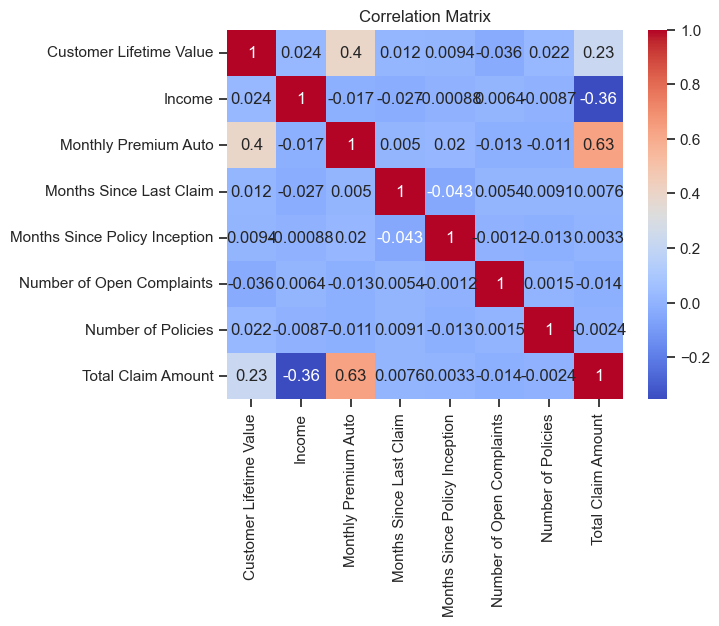

In [7]:
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
